In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df_feature = pd.read_csv("C:/Users/bazzi/Downloads/Features_data_set.csv")
df_store = pd.read_csv("C:/Users/bazzi/Downloads/stores_data-set.csv")
df_sale = pd.read_csv("C:/Users/bazzi/Downloads/sales_data-set.csv")

In [148]:
df_feature.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
919,6,09/04/2010,66.15,2.770,NaN,NaN,NaN,NaN,NaN,212.130824,7.092,False
3683,21,03/12/2010,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,False
3121,18,13/08/2010,74.19,2.810,NaN,NaN,NaN,NaN,NaN,132.630000,9.342,False
2863,16,24/08/2012,61.44,3.558,1556.47,16.0,3.34,869.05,1691.12,198.098420,6.061,False
2248,13,29/04/2011,43.85,3.683,NaN,NaN,NaN,NaN,NaN,128.999867,7.193,False


In [149]:
df_store.sample(5)

,Store,Type,Size
7,8,A,155078
15,16,B,57197
32,33,A,39690
20,21,B,140167
6,7,B,70713


In [150]:
df_sale.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
151719,16,28,06/08/2010,242.99,False
361784,39,5,07/09/2012,19112.59,True
311679,32,74,13/04/2012,14227.86,False
20688,3,2,22/04/2011,14481.21,False
115464,12,74,19/10/2012,15595.57,False


In [151]:
df_sale.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [152]:
df_store.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


# Analysis Department

In [153]:
df_Dept = df_sale.groupby('Dept').agg({'Weekly_Sales':'sum'})
df_Dept['Weekly_Sales'] = df_Dept['Weekly_Sales']/1000000
df_Dept_sort = df_Dept.sort_values(by='Weekly_Sales', ascending=False).head(10)

In [154]:
df_Dept_sort

,Weekly_Sales
Dept,
92,483.943342
95,449.320163
38,393.118137
72,305.725152
90,291.068464
40,288.936022
2,280.611174
91,216.781706
13,197.321570


Text(0.5, 1.0, 'Top 10 Department Weekly_sales')

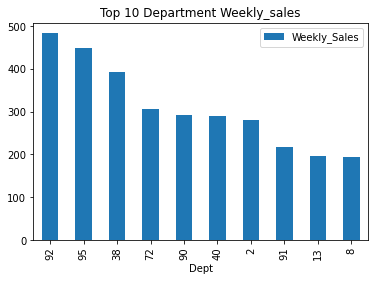

In [155]:
df_Dept_sort.plot(kind='bar')
plt.title('Top 10 Department Weekly_sales')

Text(0.5, 1.0, 'Top 10 Department Weekly_sales')

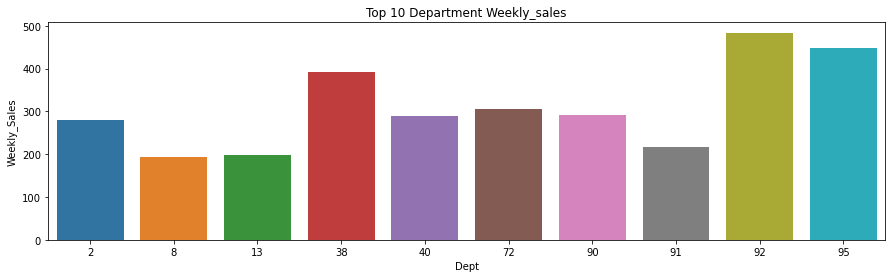

In [156]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
sns.barplot(x=df_Dept_sort.index,y=df_Dept_sort['Weekly_Sales'], data=df_Dept_sort )
plt.title('Top 10 Department Weekly_sales')

# Analysis store

In [157]:
data_store = df_feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})
temp_store = df_sale.groupby('Store').agg({'Weekly_Sales':'sum'})
temp_store['Weekly_Sales'] = temp_store['Weekly_Sales']/100000
temp_store['Weekly_Sales'] = temp_store['Weekly_Sales'].apply(int)
data_store.set_index(np.arange(0,45),inplace=True)
df_store['Temperature'] = data_store.Temperature
df_store['Fuel_Price'] = data_store.Fuel_Price
df_store['Weekly_Sales'] = temp_store.Weekly_Sales

C:\Users\bazzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

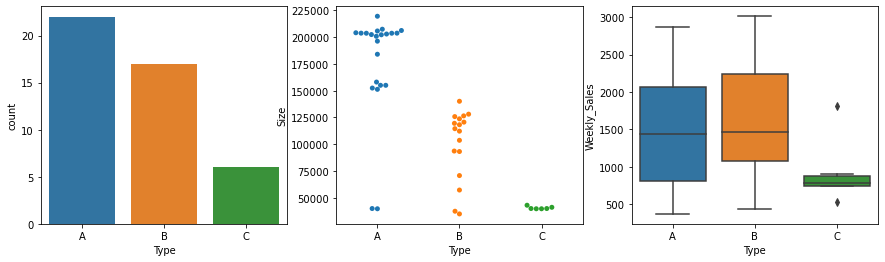

In [158]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(df_store['Type'], ax=ax[0])
sns.swarmplot(data = df_store, y='Size', x='Type', ax=ax[1])
sns.boxplot(data=df_store, y='Weekly_Sales', x='Type', ax=ax[2])

# Analysis Store Type with year-month

In [159]:
sales_date_store = df_sale.groupby(['Date','Store']).agg({'Weekly_Sales': 'sum'})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(df_feature,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table, df_store[['Store', 'Type']], how='left', on=['Store'])
data_table_weakly_sales = data_table[data_table['Weekly_Sales'].notnull()]
data_table_weakly_sales['Date'] = pd.to_datetime(data_table_weakly_sales['Date'], errors='coerce')

C:\Users\bazzi\AppData\Local\Temp/ipykernel_15976/1362985108.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table_weakly_sales['Date'] = pd.to_datetime(data_table_weakly_sales['Date'], errors='coerce')


Text(0.5, 0, 'Year')

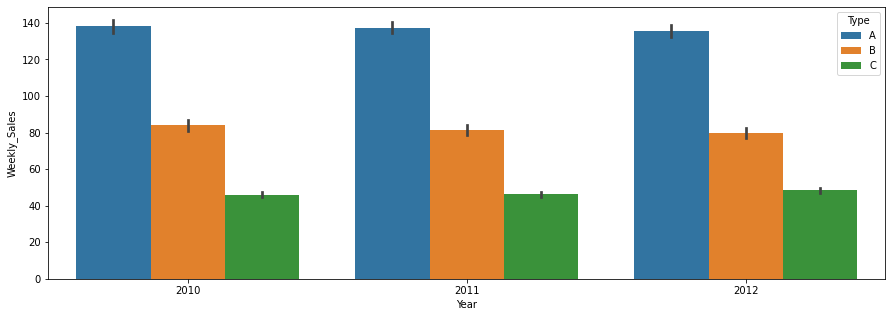

In [160]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_table_weakly_sales.Date.dt.year, y=data_table_weakly_sales['Weekly_Sales'], hue=data_table_weakly_sales['Type'])
plt.xlabel('Year')

Text(0.5, 0, 'Month')

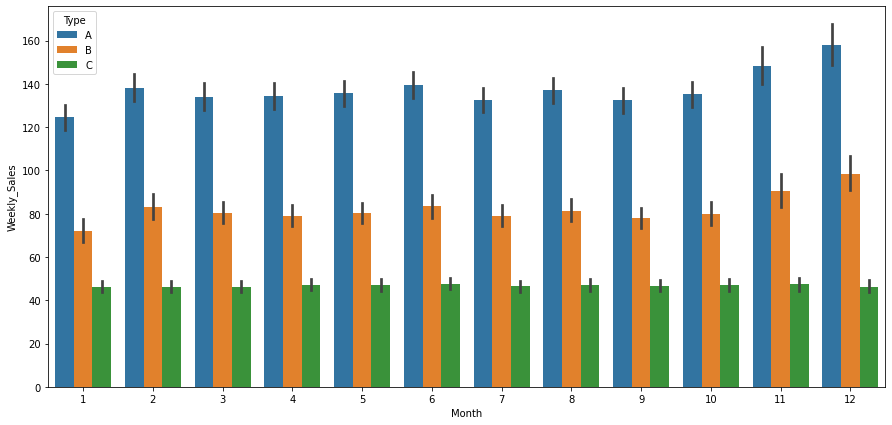

In [161]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_table_weakly_sales.Date.dt.month, y=data_table_weakly_sales['Weekly_Sales'], hue=data_table_weakly_sales['Type'])
plt.xlabel('Month')

# Analysis month , year  sales

In [162]:
data_date = df_feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date = data_date[:'2012-12-10']

data_sales_date = df_sale.groupby('Date').agg({'Weekly_Sales':'sum'})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date, left_index=True, right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )
data

,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
Date,,,,,,
01/04/2011,43,48.736444,3.602356,False,170.725418,8.150133
01/06/2012,48,72.943778,3.750822,False,175.603188,7.419533
01/07/2011,47,78.759111,3.675978,False,171.395827,8.097489
01/10/2010,42,69.868000,2.734333,False,168.354706,8.475289
02/03/2012,46,45.486444,3.696022,False,174.921137,7.508333
...,...,...,...,...,...,...
30/07/2010,44,NaN,NaN,False,NaN,NaN
30/09/2011,42,NaN,NaN,False,NaN,NaN
30/12/2011,46,NaN,NaN,False,NaN,NaN


In [163]:
data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,95.000000,95.000000,95.000000,95.000000
mean,46.601399,60.171579,3.352644,171.538614,7.999315
std,5.399713,15.449706,0.434842,3.088921,0.488028
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.266000,2.863000,168.379190,7.508333
50%,46.000000,60.890889,3.487400,171.386189,8.150133
75%,47.000000,74.669778,3.708267,174.604988,8.428578
max,80.000000,81.580222,3.997778,176.652613,8.619311


Text(0.5, 1.0, 'Month Sales')

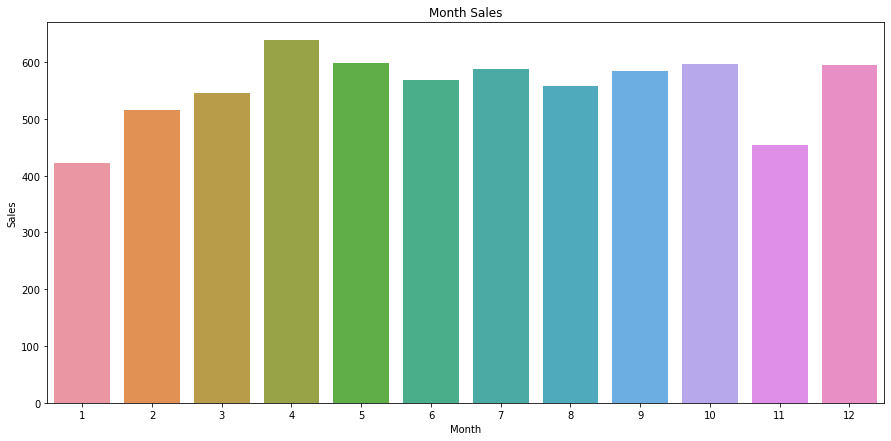

In [164]:
data.index = pd.to_datetime(data.index, errors='coerce')
data_month = data.groupby(data.index.month).agg({'Weekly_Sales':'sum'})
plt.figure(figsize=(15,7))
sns.barplot(x=data_month.index, y=data_month['Weekly_Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Month Sales')

Text(0.5, 1.0, 'Year Sales')

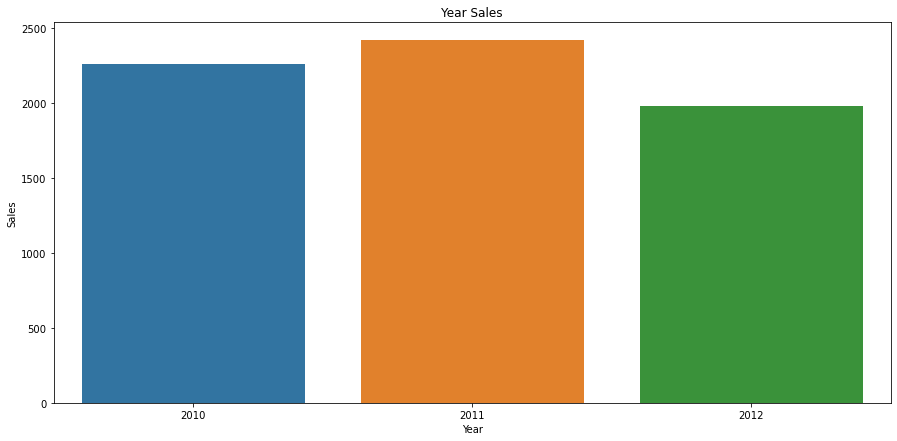

In [165]:
data_year = data.groupby(data.index.year).agg({'Weekly_Sales':'sum'})
plt.figure(figsize=(15,7))
sns.barplot(x=data_year.index, y=data_year['Weekly_Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Year Sales')

# Analysis MarkDown

In [166]:
data_table['Date'] = pd.to_datetime(data_table['Date'], errors='coerce')
temp_table = data_table[data_table['MarkDown2'].notnull()]
markdown_table = temp_table.groupby('Date').agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
markdown_table

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,
2011-02-12,5234.110000,104.955484,4469.330323,3184.650645,21310.581290
2011-09-12,5689.266667,41.249630,424.378519,3092.302593,10882.615185
2011-11-11,10732.220667,9031.857778,301.183864,4122.438378,4946.894444
2011-11-18,6114.871136,650.518864,114.090250,815.502895,5756.094545
2011-11-25,608.518286,209.536857,65516.998529,68.267500,1673.921143
...,...,...,...,...,...
2013-08-03,20344.702973,195.760541,60.000270,5942.530811,4793.095946
2013-10-05,5872.979189,321.387838,61.291351,1741.930270,7098.858919
2013-11-01,3374.089111,12718.571333,4.510976,353.884054,3105.464000


Text(0, 0.5, 'MarkDown')

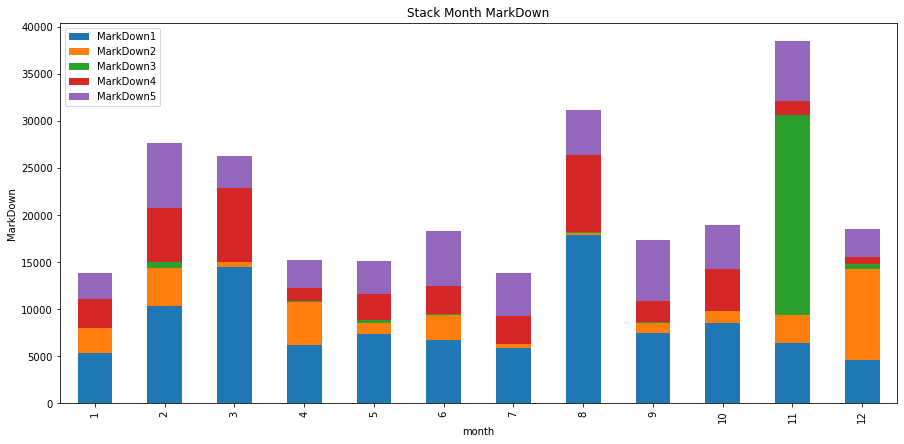

In [167]:
markdown_month = markdown_table.groupby(markdown_table.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
markdown_month.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Stack Month MarkDown')
plt.xlabel('month')
plt.ylabel('MarkDown')

Text(0, 0.5, 'MarkDown')

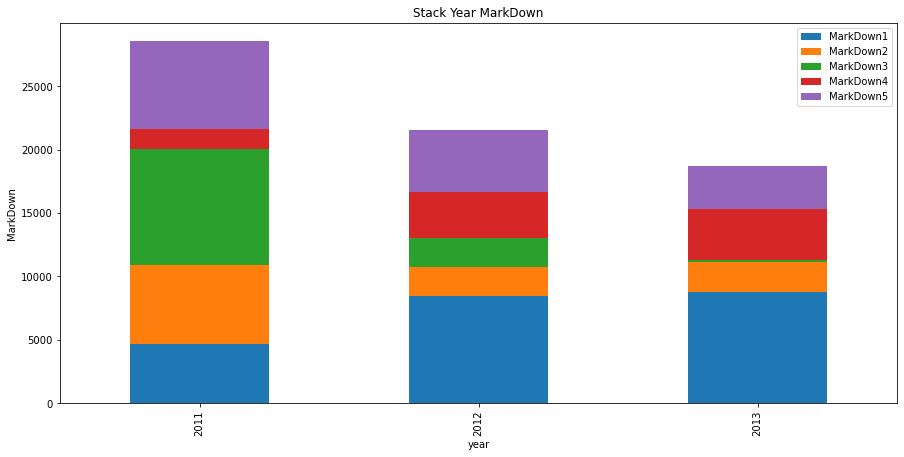

In [168]:
markdown_year = markdown_table.groupby(markdown_table.index.year).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
markdown_year.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Stack Year MarkDown')
plt.xlabel('year')
plt.ylabel('MarkDown')

<AxesSubplot:xlabel='Type'>

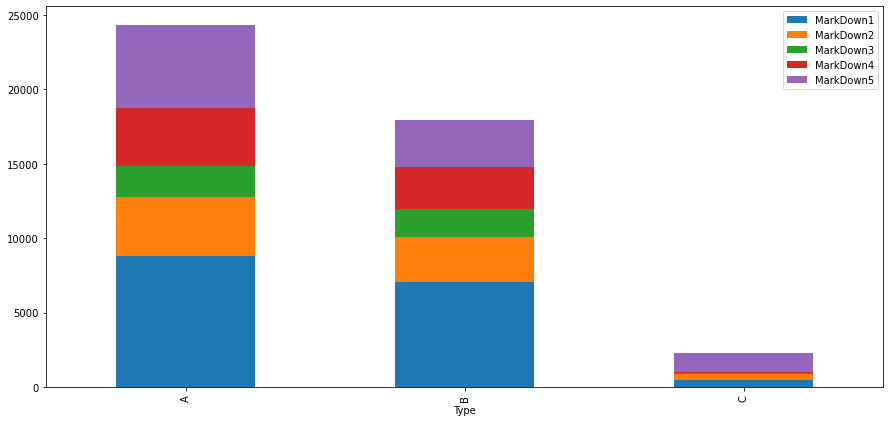

In [169]:
markdown_type_store = data_table.groupby('Type').agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})
markdown_type_store.plot(kind='bar', stacked=True, figsize=(15,7))


<AxesSubplot:>

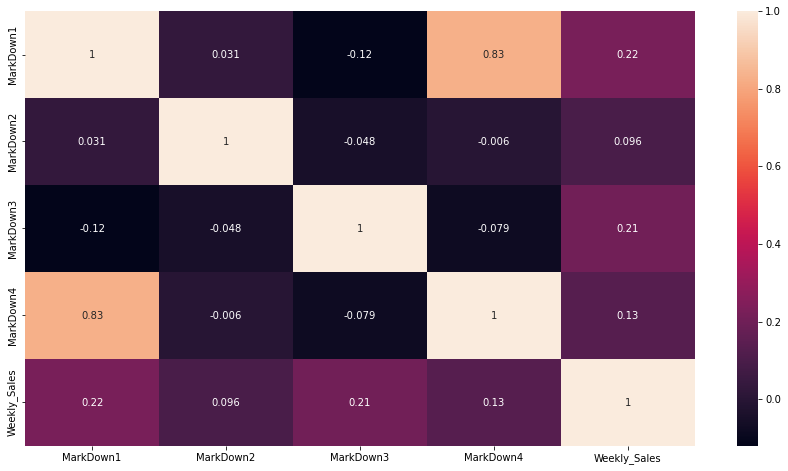

In [170]:
data_tempo = data_table[data_table['Weekly_Sales'].notnull() & data_table['MarkDown2'].notnull()]
data_select = data_tempo[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','Weekly_Sales']]

plt.figure(figsize=(15,8))
sns.heatmap(data_select.corr(), annot=True)

# Predict Weekly Sales

In [171]:
data_table[data_table['MarkDown2'].isnull()]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,164.0,A
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,164.0,A
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,161.0,A
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,140.0,A
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,155.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,45,2012-12-21,43.54,3.577,4187.83,NaN,238.00,92.68,2977.33,192.458906,8.667,False,NaN,B
8170,45,2013-03-15,42.81,3.834,9867.03,NaN,11.08,912.87,1360.36,193.296277,8.625,False,NaN,B
8171,45,2013-03-22,36.55,3.800,11923.74,NaN,308.00,1764.47,1647.31,193.369533,8.625,False,NaN,B
8172,45,2013-03-29,40.68,3.784,5444.00,NaN,350.84,53.90,1722.11,193.442790,8.625,False,NaN,B


In [172]:
data_table.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,6435.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,104.195338
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,56.435933
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,20.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,55.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,96.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,141.500000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,381.000000


In [173]:
#fillna 
data_table['MarkDown1'] = data_table['MarkDown1'].fillna(0)
data_table['MarkDown2'] = data_table['MarkDown2'].fillna(0)
data_table['MarkDown3'] = data_table['MarkDown3'].fillna(0)
data_table['MarkDown4'] = data_table['MarkDown4'].fillna(0)
data_table['MarkDown5'] = data_table['MarkDown5'].fillna(0)

In [174]:
data_table

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type
0,1,2010-05-02,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,164.0,A
1,1,2010-12-02,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,164.0,A
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,161.0,A
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,140.0,A
4,1,2010-05-03,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,155.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,B
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,B
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,B
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,B


In [175]:
def createdummies(data,cols):
    for col in cols:
        one_hot = pd.get_dummies(data[col],prefix=col)
        data = data.join(one_hot)
        data.drop(col,axis = 1,inplace=True)
    
    return data

In [176]:
data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})

#create new column
data_table["Month"] = data_table.Date.dt.month
data_table["Year"] = data_table.Date.dt.year
data_table["WeekofYear"] = data_table.Date.dt.weekofyear
data_table.drop(['Date'],axis=1,inplace=True)

#create dummies out of categorical column
data_tables = createdummies(data_table,["Type","Month","Year","WeekofYear"])

C:\Users\bazzi\AppData\Local\Temp/ipykernel_15976/367462753.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_table["WeekofYear"] = data_table.Date.dt.weekofyear


In [177]:
data_train = data_tables[data_tables.Weekly_Sales.notnull()]
data_test = data_tables[data_tables.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor

In [190]:
classifiers = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()]

name = []
models = []
mape = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    models.append(classifier)
    mape.append(np.sqrt(mean_absolute_percentage_error(classifier.predict(X_test), y_test))*100)

In [191]:
df_score = pd.DataFrame(list(zip(name,mape,models)),columns=['name','mape',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['mape'],inplace=True)
df_score

,mape,model
name,,
RandomForestRegressor,23.444786,"(DecisionTreeRegressor(max_features=1.0, rando..."
DecisionTreeRegressor,25.974430,DecisionTreeRegressor()
GradientBoostingRegressor,34.478722,([DecisionTreeRegressor(criterion='friedman_ms...
LinearRegression,58.383875,LinearRegression()
